In [3]:
import pandas as pd

data = pd.read_csv('nvidia_stock_prices.csv')
df=pd.DataFrame(data)
print(df)

            Date       Open       High        Low      Close      Volume
0     2004-01-02   0.196417   0.199083   0.192333   0.192333   436416000
1     2004-01-05   0.195250   0.199917   0.193500   0.198583   575292000
2     2004-01-06   0.198000   0.209417   0.197083   0.206667  1093344000
3     2004-01-07   0.204333   0.209500   0.202917   0.208500   673032000
4     2004-01-08   0.211083   0.212083   0.207250   0.209250   433752000
...          ...        ...        ...        ...        ...         ...
5028  2023-12-22  49.195000  49.382999  48.466999  48.830002   252507000
5029  2023-12-26  48.967999  49.599998  48.959999  49.278999   244200000
5030  2023-12-27  49.511002  49.680000  49.084999  49.417000   233648000
5031  2023-12-28  49.643002  49.883999  49.411999  49.521999   246587000
5032  2023-12-29  49.813000  49.997002  48.750999  49.521999   389293000

[5033 rows x 6 columns]


In [5]:
missingValues = df.isnull().sum()
print(missingValues)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date' , inplace= True)
print(df)

                 Open       High        Low      Close      Volume
Date                                                              
2004-01-02   0.196417   0.199083   0.192333   0.192333   436416000
2004-01-05   0.195250   0.199917   0.193500   0.198583   575292000
2004-01-06   0.198000   0.209417   0.197083   0.206667  1093344000
2004-01-07   0.204333   0.209500   0.202917   0.208500   673032000
2004-01-08   0.211083   0.212083   0.207250   0.209250   433752000
...               ...        ...        ...        ...         ...
2023-12-22  49.195000  49.382999  48.466999  48.830002   252507000
2023-12-26  48.967999  49.599998  48.959999  49.278999   244200000
2023-12-27  49.511002  49.680000  49.084999  49.417000   233648000
2023-12-28  49.643002  49.883999  49.411999  49.521999   246587000
2023-12-29  49.813000  49.997002  48.750999  49.521999   389293000

[5033 rows x 5 columns]


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data,columns = df.columns , index=df.index)
print(normalized_df)


                Open      High       Low     Close    Volume
Date                                                        
2004-01-02  0.002310  0.002282  0.002328  0.002260  0.077483
2004-01-05  0.002287  0.002299  0.002351  0.002384  0.105020
2004-01-06  0.002342  0.002487  0.002424  0.002545  0.207741
2004-01-07  0.002468  0.002489  0.002542  0.002581  0.124400
2004-01-08  0.002603  0.002540  0.002630  0.002596  0.076955
...              ...       ...       ...       ...       ...
2023-12-22  0.979635  0.976914  0.980845  0.968627  0.041017
2023-12-26  0.975107  0.981214  0.990838  0.977548  0.039370
2023-12-27  0.985938  0.982800  0.993372  0.980290  0.037278
2023-12-28  0.988571  0.986842  1.000000  0.982376  0.039844
2023-12-29  0.991962  0.989081  0.986602  0.982376  0.068140

[5033 rows x 5 columns]


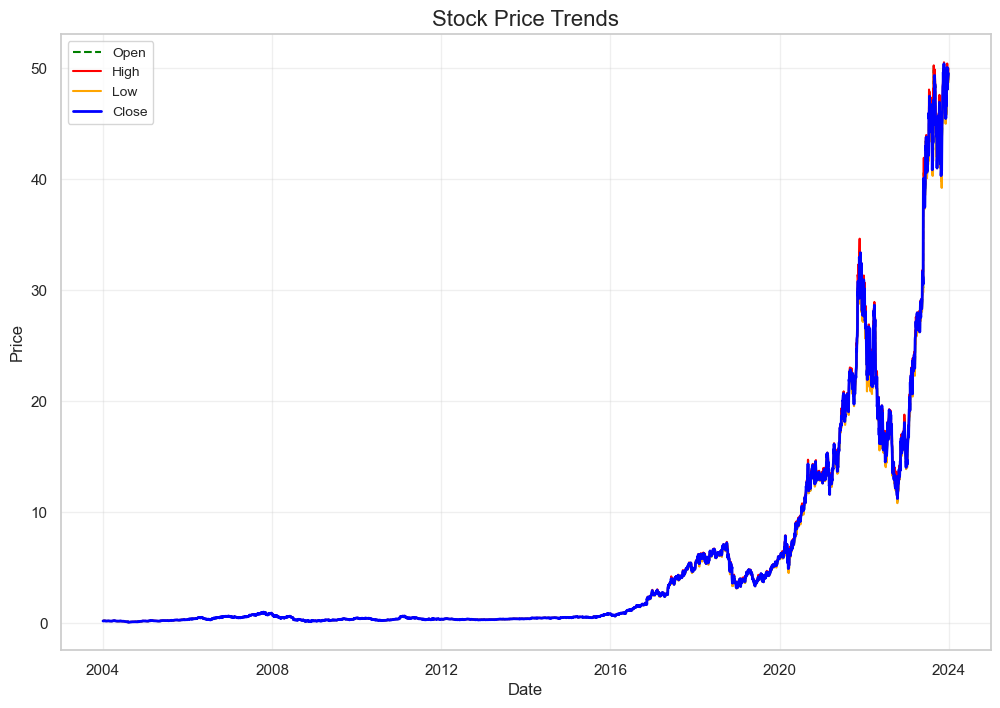

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.lineplot(data=df, x=df.index, y='Open', label='Open', color='green', linestyle='--')
sns.lineplot(data=df, x=df.index, y='High', label='High', color='red')
sns.lineplot(data=df, x=df.index, y='Low', label='Low', color='orange')
sns.lineplot(data=df, x=df.index, y='Close', label='Close', color='blue', linewidth=2)

plt.fill_between(df.index, df['Low'], df['High'], color='gray', alpha=0.2)

plt.title('Stock Price Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.show()

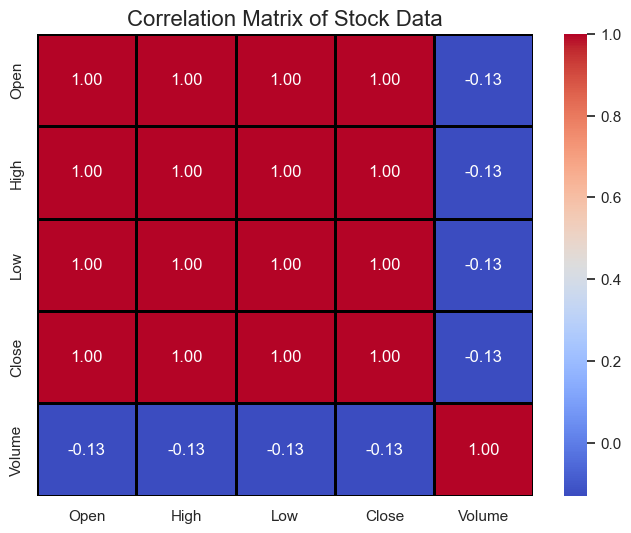

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Matrix of Stock Data', fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

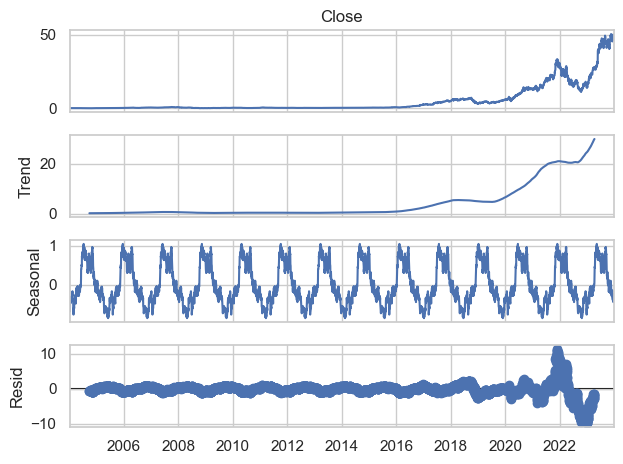

In [12]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=365)  # Set period for seasonality (e.g., daily data with annual seasonality)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

<Figure size 1200x600 with 0 Axes>

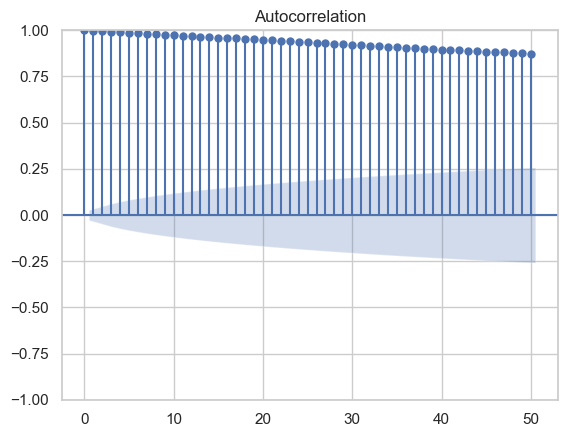

<Figure size 1200x600 with 0 Axes>

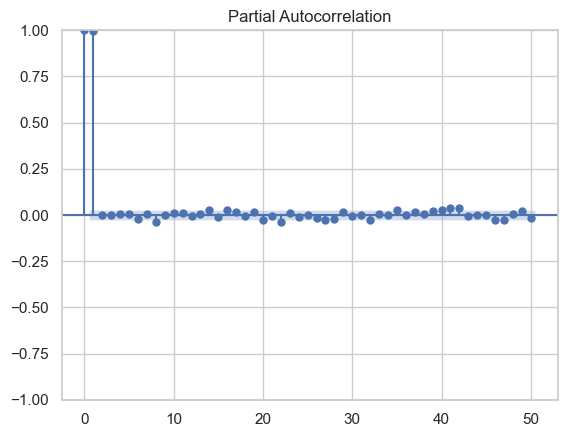

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=50) 
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Close'], lags=50)
plt.show()

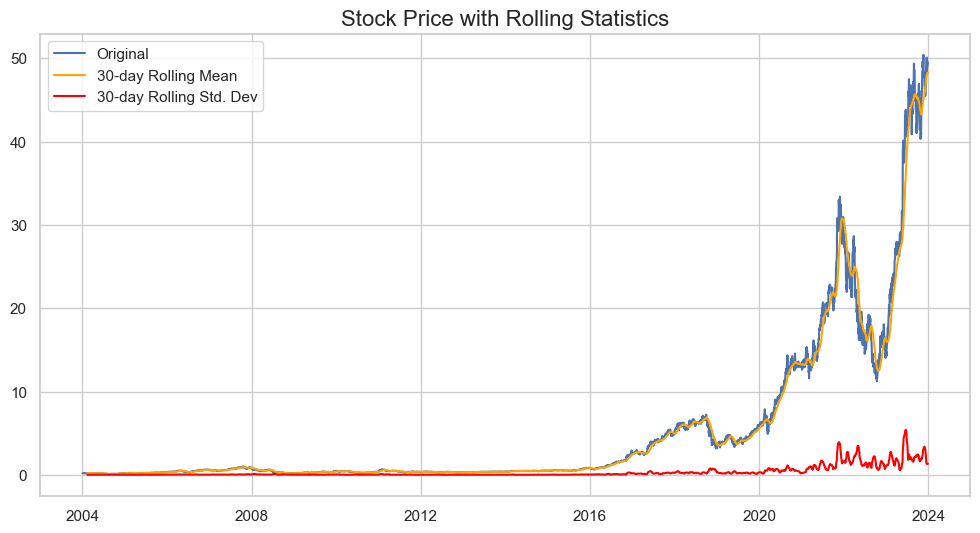

In [14]:
rolling_mean = df['Close'].rolling(window=30).mean()  
rolling_std = df['Close'].rolling(window=30).std()   

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='30-day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-day Rolling Std. Dev', color='red')
plt.title('Stock Price with Rolling Statistics', fontsize=16)
plt.legend()
plt.show()

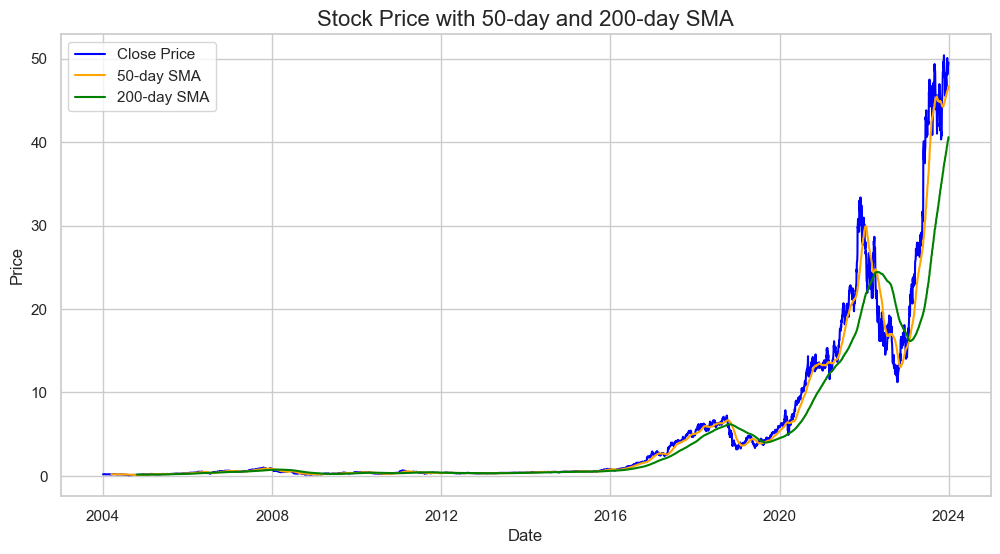

In [15]:
df['50-day SMA'] = df['Close'].rolling(window=50).mean() 
df['200-day SMA'] = df['Close'].rolling(window=200).mean() 

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['50-day SMA'], label='50-day SMA', color='orange')
plt.plot(df['200-day SMA'], label='200-day SMA', color='green')
plt.title('Stock Price with 50-day and 200-day SMA', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

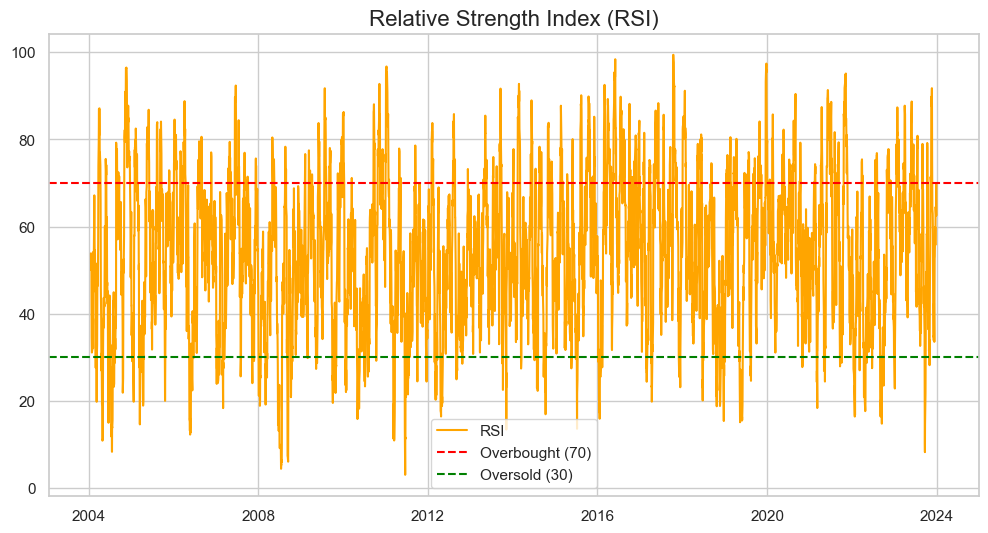

In [16]:
df['Price Change'] = df['Close'].diff()

df['Gain'] = df['Price Change'].where(df['Price Change'] > 0, 0)
df['Loss'] = -df['Price Change'].where(df['Price Change'] < 0, 0)

n = 14
df['Avg Gain'] = df['Gain'].rolling(window=n).mean()
df['Avg Loss'] = df['Loss'].rolling(window=n).mean()

df['RS'] = df['Avg Gain'] / df['Avg Loss']

df['RSI'] = 100 - (100 / (1 + df['RS']))

plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)', fontsize=16)
plt.legend()
plt.show()

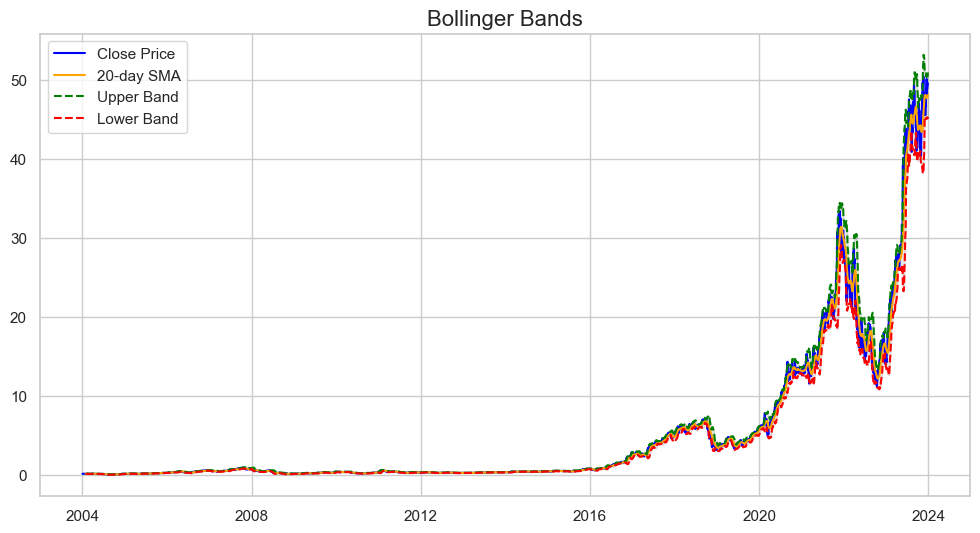

In [17]:
df['20-day SMA'] = df['Close'].rolling(window=20).mean()

df['20-day Std'] = df['Close'].rolling(window=20).std()

df['Upper Band'] = df['20-day SMA'] + (2 * df['20-day Std'])
df['Lower Band'] = df['20-day SMA'] - (2 * df['20-day Std'])

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['20-day SMA'], label='20-day SMA', color='orange')
plt.plot(df['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(df['Lower Band'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(df.index, df['Lower Band'], df['Upper Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands', fontsize=16)
plt.legend()
plt.show()

In [18]:
df['Close_t-1'] = df['Close'].shift(1)  # Lag 1: Close of the previous day
df['Close_t-2'] = df['Close'].shift(2)  # Lag 2: Close two days ago
df['Close_t-3'] = df['Close'].shift(3)  # Lag 3: Close three days ago

# Display the DataFrame with lagged features
print(df)


                 Open       High        Low      Close      Volume  \
Date                                                                 
2004-01-02   0.196417   0.199083   0.192333   0.192333   436416000   
2004-01-05   0.195250   0.199917   0.193500   0.198583   575292000   
2004-01-06   0.198000   0.209417   0.197083   0.206667  1093344000   
2004-01-07   0.204333   0.209500   0.202917   0.208500   673032000   
2004-01-08   0.211083   0.212083   0.207250   0.209250   433752000   
...               ...        ...        ...        ...         ...   
2023-12-22  49.195000  49.382999  48.466999  48.830002   252507000   
2023-12-26  48.967999  49.599998  48.959999  49.278999   244200000   
2023-12-27  49.511002  49.680000  49.084999  49.417000   233648000   
2023-12-28  49.643002  49.883999  49.411999  49.521999   246587000   
2023-12-29  49.813000  49.997002  48.750999  49.521999   389293000   

            50-day SMA  200-day SMA  Price Change      Gain  Loss  ...  \
Date           

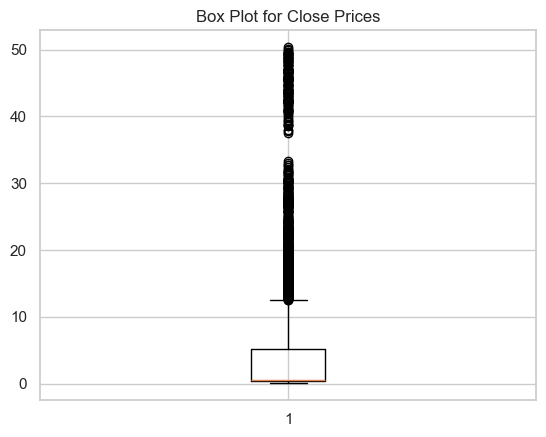

In [31]:
import matplotlib.pyplot as plt

plt.boxplot(df['Close'])
plt.title('Box Plot for Close Prices')
plt.show()

In [33]:
from scipy.stats import zscore

z_scores = zscore(df['Close'])
abs_z_scores = abs(z_scores)
outliers = df[abs_z_scores > 3]  # Data points with Z-score > 3
print(outliers)

                 Open       High        Low      Close      Volume  \
Date                                                                 
2023-05-25  38.522999  39.480000  36.634998  37.980000  1543911000   
2023-05-26  37.889999  39.169998  37.549999  38.945999   714397000   
2023-05-30  40.595001  41.938000  39.949001  40.111000   923401000   
2023-05-31  39.487999  40.294998  37.821999  37.834000  1002580000   
2023-06-01  38.488998  40.049999  38.340000  39.770000   635873000   
...               ...        ...        ...        ...         ...   
2023-12-22  49.195000  49.382999  48.466999  48.830002   252507000   
2023-12-26  48.967999  49.599998  48.959999  49.278999   244200000   
2023-12-27  49.511002  49.680000  49.084999  49.417000   233648000   
2023-12-28  49.643002  49.883999  49.411999  49.521999   246587000   
2023-12-29  49.813000  49.997002  48.750999  49.521999   389293000   

            50-day SMA  200-day SMA  Price Change      Gain   Loss  ...  \
Date          

### **Project: Stock Price Prediction Using Machine Learning**

**Objective**: Develop a machine learning model to predict future stock prices based on historical data, using regression techniques or time-series forecasting.

---

### **Steps to Complete the Project:**

#### 1. **Define the Problem**
   - Goal: Predict stock prices for the next day/week/month.
   - Target Variable: Closing Price of a specific stock.

#### 2. **Data Collection**
   - Use financial APIs like:
     - Yahoo Finance API (via `yfinance` Python library).
     - Alpha Vantage.
     - Quandl.
   - Collect historical stock data, including:
     - `Date`, `Open`, `High`, `Low`, `Close`, and `Volume`.

#### 3. **Data Cleaning and Preprocessing**
   - Handle missing values in the dataset.
   - Convert `Date` column to datetime format and set it as the index.
   - Normalize numerical features if required.

#### 4. **Exploratory Data Analysis (EDA)**
   - Visualize stock trends using line charts.
   - Analyze correlations between `Open`, `Close`, `High`, `Low`, and `Volume`.
   - Identify patterns in the data, such as seasonality.

#### 5. **Feature Engineering**
   - Create technical indicators:
     - Moving Averages (e.g., 50-day SMA, 200-day SMA).
     - Relative Strength Index (RSI).
     - Bollinger Bands.
   - Lag features (e.g., `Close_t-1`, `Close_t-2`).

#### 6. **Model Development**
   - **Regression Models**:
     - Linear Regression.
     - Decision Trees/Random Forest.
   - **Time-Series Models**:
     - ARIMA or SARIMA.
     - Long Short-Term Memory (LSTM) Neural Networks.

#### 7. **Model Evaluation**
   - Use metrics like:
     - Mean Absolute Error (MAE).
     - Root Mean Squared Error (RMSE).
     - Mean Absolute Percentage Error (MAPE).

#### 8. **Visualization**
   - Plot actual vs. predicted prices.
   - Show the error distribution.
   - Overlay predictions on historical trends.

#### 9. **Deploy the Model (Optional)**
   - Create a dashboard using **Streamlit** or **Flask** to visualize predictions interactively.

#### 10. **Insights and Recommendations**
   - Explain the model’s limitations (e.g., market volatility).
   - Highlight potential use cases, such as investment strategies.

---

Let me know if you’d like help implementing any part of this project! 🚀